In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
import matplotlib.pyplot as plt
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
import warnings


In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session1 = fastf1.get_session(2025, 'China Grand Prix', 'SQ')
session1.load()
# In this way i Can exclude the box laps
laps1 = session1.laps.pick_wo_box()

# Pick just the accurate laps
laps1 = laps1[laps1['IsAccurate']==True]

circuit_info = session1.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (3.39 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Chinese Grand Prix - Sprint Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '

In [3]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session2 = fastf1.get_session(2025, 'China Grand Prix', 'Q')
session2.load()
# In this way i Can exclude the box laps
laps2 = session2.laps.pick_wo_box()

# Pick just the accurate laps
laps2 = laps2[laps2['IsAccurate']==True]

circuit_info = session2.get_circuit_info()




core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '1', '44', '16', '6', '12', '22', '23', '31', '27', '14', '18', '55', '10', '87', '7', '5', '30

In [4]:
drivers1=laps1['Driver'].unique()
compounds1 = laps1['Compound'].unique()

drivers2 =laps2['Driver'].unique()
compounds2 = laps2['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [6]:
# Transform the laps in total seconds
transformed_laps1 = laps1.copy()
transformed_laps1.loc[:, "LapTime (s)"] = laps1["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps1[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [7]:
# Transform the laps in total seconds
transformed_laps2 = laps2.copy()
transformed_laps2.loc[:, "LapTime (s)"] = laps2["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps2[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            return fastf1.plotting.team_color(team)
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

team_palette = {team: get_team_color(team) for team in team_order}


/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:237: FutureWarning: The function `team_color` is deprecated and will be removed in a future version. Use `fastf1.plotting.get_team_color` instead.
  warnings.warn("The function `team_color` is deprecated and will be "
_plotting    WARNING 	Correcting invalid user input 'red bull ' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input ' bulls' to 'red bull'.
_plotting    WARNING 	Correcting invalid user input 'haas  ' to 'haas'.


In [8]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "LAW": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "TSU": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [9]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

In [30]:
from fastf1.utils import delta_time

warnings.filterwarnings(
    "ignore",
    message="`utils.delta_time` is considered deprecated.*",
    category=FutureWarning
)

class FastestLap:
    def __init__(self, lap):
        self.name = lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2

def compute_acceleration(df):
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6
    df['Sess_s'] = df['SessionTime'].dt.total_seconds()
    df['Acc'] = np.gradient(df['Speed_ms'], df['Sess_s'])
    return df

def compare_two_laps(lap1, lap2, circuit_info, channels=None, labels=("SQ", "Q"), colors=("red", "white")):
    """
    Compare two laps from different sessions (e.g. Sprint Quali and Qualifying).
    :param lap1, lap2: FastF1 Lap objects
    :param circuit_info: FastF1 circuit info from either session.get_circuit_info()
    :param channels: Telemetry channels to compare
    :param labels: Tuple of names to display (e.g. driver or session labels)
    :param colors: Tuple of colors for each lap
    """
    # Wrap and compute
    laps = []
    for lap in [lap1, lap2]:
        fl = FastestLap(lap)
        fl.df = compute_acceleration(fl.df)
        laps.append(fl)

    lap_times = [lap1['LapTime'].total_seconds(), lap2['LapTime'].total_seconds()]
    baseline_idx = np.argmin(lap_times)

    s1_dist, s2_dist = laps[baseline_idx].sector_distances
    corner_distances = circuit_info.corners['Distance'].values

    default_channels = ['Speed', 'Throttle', 'Brake', 'RPM', 'nGear', 'DRS']
    units = {'Speed': 'km/h', 'Throttle': '%', 'Brake': '%', 'RPM': 'rpm', 'nGear': '', 'DRS': ''}
    channels = channels or default_channels

    n_plots = len(channels) + 1 + 1  # +1 for Acc, +1 for Delta
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 3.5 * n_plots), sharex=True)
    plt.style.use('dark_background')
    if n_plots == 1:
        axes = [axes]

    # Telemetry channels
    for i, ch in enumerate(channels):
        ax = axes[i]
        for fl, color, label in zip(laps, colors, labels):
            if ch in fl.df.columns:
                ax.plot(fl.df['Distance'], fl.df[ch], color=color, label=f"{label} {ch}")
        ax.set_ylabel(f"{ch} ({units[ch]})", color='white')
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.tick_params(colors='white')
        ax.axvline(s1_dist, color='white', linestyle='--')
        ax.axvline(s2_dist, color='white', linestyle='--')
        for num, d in enumerate(corner_distances, start=1):
            ax.text(d, ax.get_ylim()[0], str(num), color='white', fontsize=8,
                    ha='center', va='bottom')

    # Acceleration
    ax_acc = axes[len(channels)]
    for fl, color, label in zip(laps, colors, labels):
        ax_acc.plot(fl.df['Distance'], fl.df['Acc'], color=color, label=f"{label} Acc")
    ax_acc.set_ylabel('Acc (m/s²)', color='white')
    ax_acc.legend(loc='upper right')
    ax_acc.grid(True, linestyle='--', linewidth=0.5)
    ax_acc.tick_params(colors='white')

    # Delta Time
    ax_dt = axes[-1]
    ref_lap = lap1 if baseline_idx == 0 else lap2
    cmp_lap = lap2 if baseline_idx == 0 else lap1
    delta_series, ref_tel, cmp_tel = delta_time(ref_lap, cmp_lap)
    ax_dt.plot(ref_tel['Distance'], delta_series, color=colors[1 - baseline_idx],
               label=f"Δ ({labels[1 - baseline_idx]} - {labels[baseline_idx]})")
    ax_dt.set_ylabel('Δ Time (s)', color='white')
    ax_dt.axhline(0, color='white', linestyle='--')
    ax_dt.grid(True, linestyle='--', linewidth=0.5)
    ax_dt.tick_params(colors='white')
    ax_dt.set_xlabel('Distance (m)', color='white')
    ax_dt.legend(loc='upper right', title=f"Benchmark: {labels[baseline_idx]}")
    ax_dt.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax_dt.xaxis.set_minor_locator(plt.MultipleLocator(100))

    # Annotate lap times
    labels_txt = [f"{labels[0]}: {int(lap_times[0]//60)}:{lap_times[0]%60:06.3f}",
                  f"{labels[1]}: {int(lap_times[1]//60)}:{lap_times[1]%60:06.3f}"]
    fig.text(0.02, 0.98, "\n".join(labels_txt), ha='left', va='top', color='white',
             fontsize=10, bbox=dict(facecolor='black', alpha=0.5, pad=4))

    # Signature
    fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=15)
    fig.suptitle("Sprint Qualifying vs Qualifying Lap Comparison", color='white')
    fig.subplots_adjust(top=0.92)
    plt.tight_layout(rect=[0, 0, 0.90, 0.97])
    plt.show()

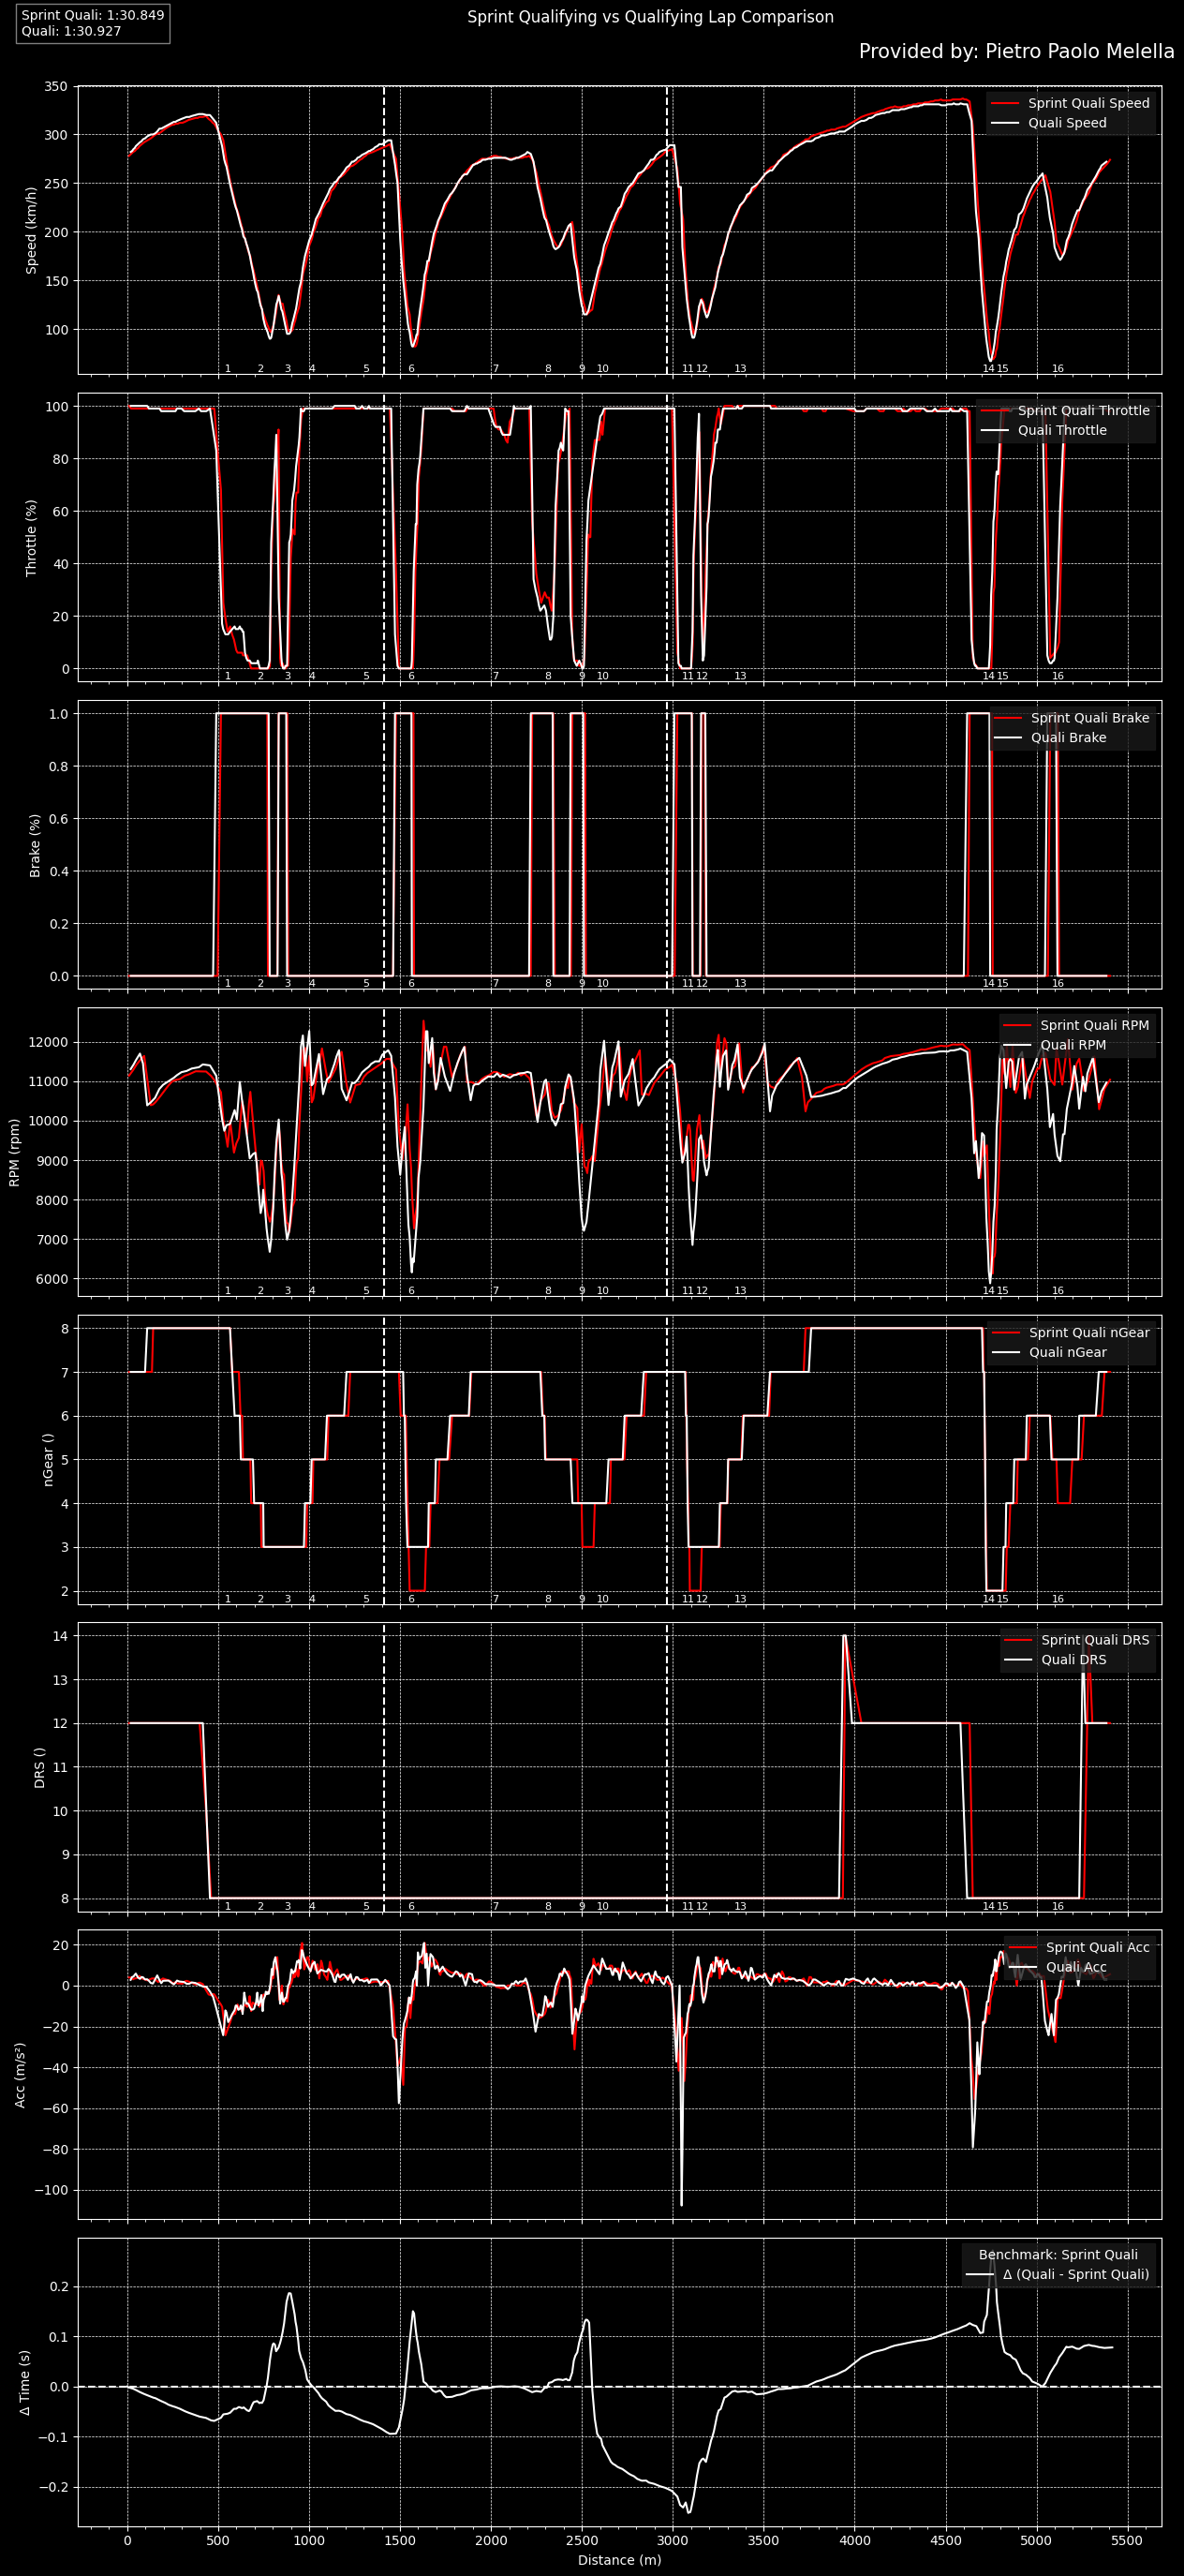

In [31]:
lap_sq = laps1.pick_drivers('HAM').pick_fastest()
lap_q  = laps2.pick_drivers('HAM').pick_fastest()
compare_two_laps(lap_sq, lap_q, circuit_info, labels=('Sprint Quali', 'Quali'))

In [18]:
class CornerAnalysis:
    """
    Analyze telemetry for one or more corners (or a corner range), from multiple laps or sessions.

    Parameters:
      - laps: dict of {driver_code: FastF1 Lap object}
      - circuit_info: result of session.get_circuit_info()
      - session_info: dict with 'EventName' and 'Year'
      - corner_idxs: int or tuple/list of two ints (1-based corner numbers)
      - before: meters before the first corner apex to include
      - after:  meters after the last corner apex to include
      - session_label: string to include in plot title (e.g. 'SQ vs Q')

    Example:
      laps = {'VER': lap_sq, 'VER_Q': lap_q}
      ca = CornerAnalysis(laps, circuit_info, session_info, corner_idxs=6, before=50, after=50)
      ca.plot_all()
    """
    def __init__(self, laps, circuit_info, session_info, corner_idxs, before=50, after=50, session_label=''):
        if not (1 <= len(laps) <= 4):
            raise ValueError("laps must include 1 to 4 entries")

        self.laps = laps
        self.drivers = list(laps.keys())
        self.circuit_info = circuit_info
        self.session_info = session_info
        self.before = before
        self.after = after
        self.session_label = session_label

        # Normalize user-provided corner_idxs (1-based) to 0-based
        if isinstance(corner_idxs, int):
            idx = corner_idxs - 1
            self.start_idx = self.end_idx = idx
        elif hasattr(corner_idxs, '__iter__') and len(corner_idxs) == 2:
            self.start_idx = corner_idxs[0] - 1
            self.end_idx   = corner_idxs[1] - 1
        else:
            raise ValueError("corner_idxs must be an int or a 2-tuple/list of ints (1-based)")

        # Define a simple color palette
        self.palette = ['red', 'white'][:len(self.drivers)]

        # Interpolated telemetry per driver
        self.telemetry = {}
        self._load_data()

    def _load_data(self):
        """Load and interpolate telemetry for all laps."""
        for driver, lap in self.laps.items():
            df = lap.get_car_data().add_distance()
            df = interpolate_dataframe(df)
            self.telemetry[driver] = df

    def get_corner_df(self, driver):
        """Return a sliced telemetry DataFrame for a driver over the selected corner(s)."""
        df = self.telemetry[driver]
        corners = self.circuit_info.corners['Distance'].values
        start_dist = corners[self.start_idx] - self.before
        end_dist   = corners[self.end_idx] + self.after
        dfc = df[(df['Distance'] >= start_dist) & (df['Distance'] <= end_dist)].copy()
        dfc['Speed_ms'] = dfc['Speed'] / 3.6
        dfc['Sess_s']   = dfc['SessionTime'].dt.total_seconds()
        dfc['Acc']      = np.gradient(dfc['Speed_ms'], dfc['Sess_s'])
        return dfc

    def plot_all(self):
        """Plot Speed, Acc, Throttle, Brake over the corner region for each driver."""
        channels = ['Speed', 'Acc', 'Throttle', 'Brake']
        n = len(channels)
        fig, axs = plt.subplots(n, 1, figsize=(10, 3*n), sharex=True)
        plt.style.use('dark_background')

        # Title
        event = self.session_info.get('EventName', 'Event')
        year  = self.session_info.get('Year', 'Year')
        if self.start_idx == self.end_idx:
            corner_label = f"Corner {self.start_idx+1}"
        else:
            corner_label = f"Corners {self.start_idx+1}-{self.end_idx+1}"
        title = f"{event} {year} {self.session_label} - {corner_label}"
        fig.suptitle(title, color='white')
        fig.subplots_adjust(top=0.90)

        # Plot each telemetry channel
        for idx, ch in enumerate(channels):
            ax = axs[idx]
            for driver, color in zip(self.drivers, self.palette):
                dfc = self.get_corner_df(driver)
                ax.plot(dfc['Distance'], dfc[ch], color=color, label=f"{driver} {ch}")
            ax.set_ylabel(ch, color='white')
            ax.legend(loc='upper right')
            ax.grid(True, linestyle='--', linewidth=0.5)
            ax.tick_params(colors='white')
            if idx == n-1:
                ax.set_xlabel('Distance (m)', color='white')

            # Mark apex(es)
            for apex_idx in range(self.start_idx, self.end_idx + 1):
                ax.axvline(self.circuit_info.corners['Distance'].values[apex_idx],
                           color='white', linestyle=':')

        # Annotate signature
        fig.text(0.95, 0.93,
                 "Provided by: Pietro Paolo Melella",
                 ha='right', va='bottom',
                 color='white', fontsize=15)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

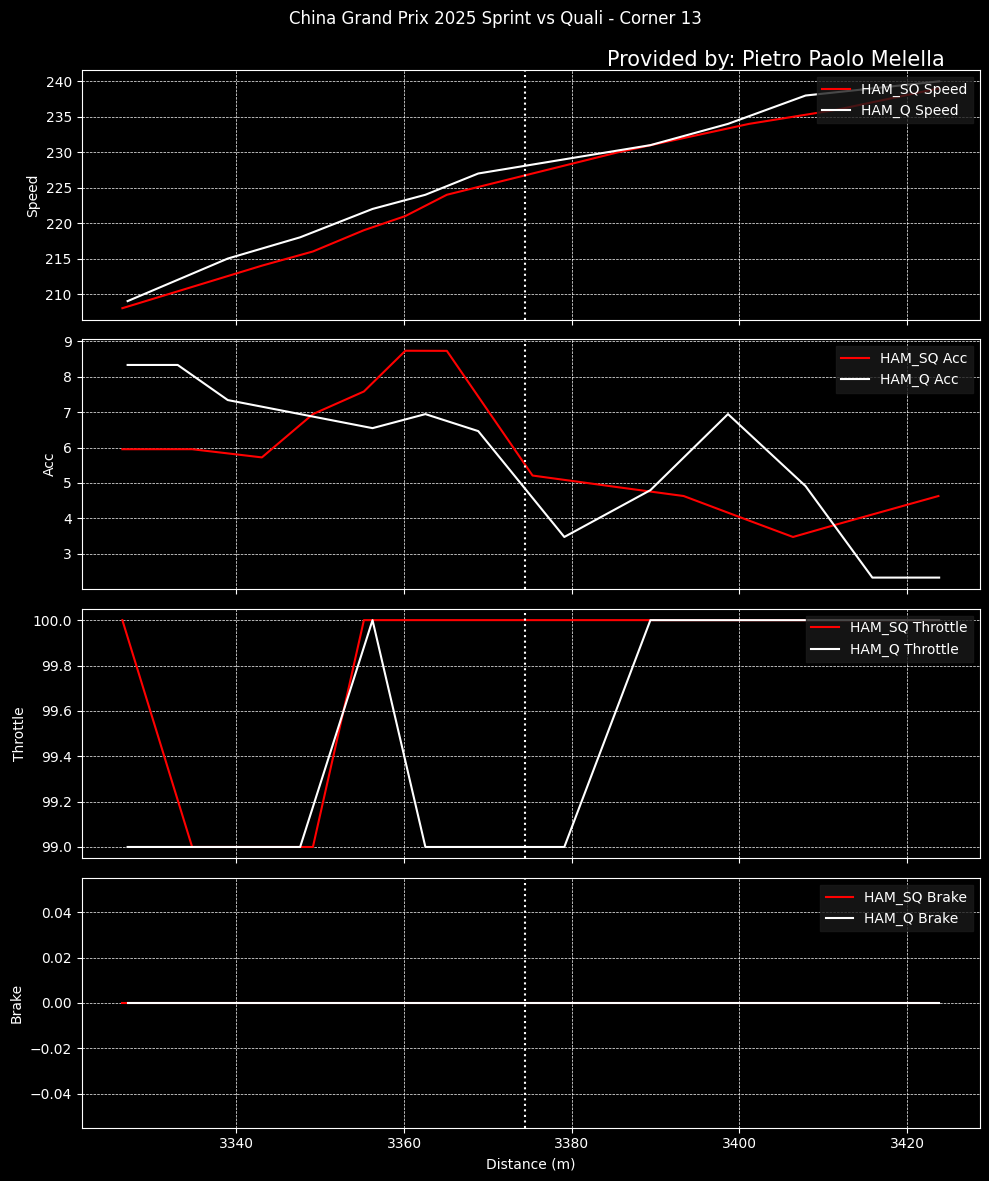

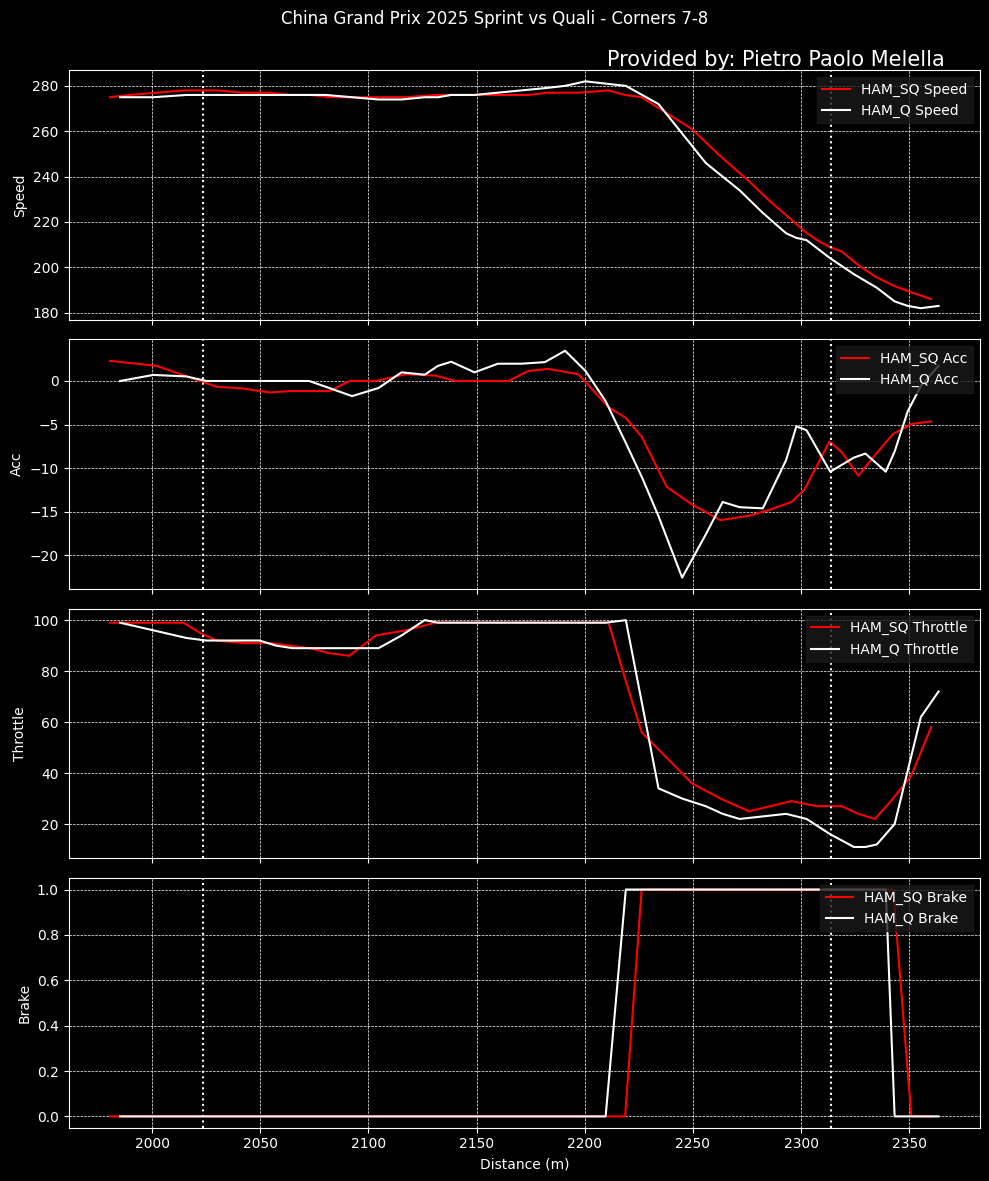

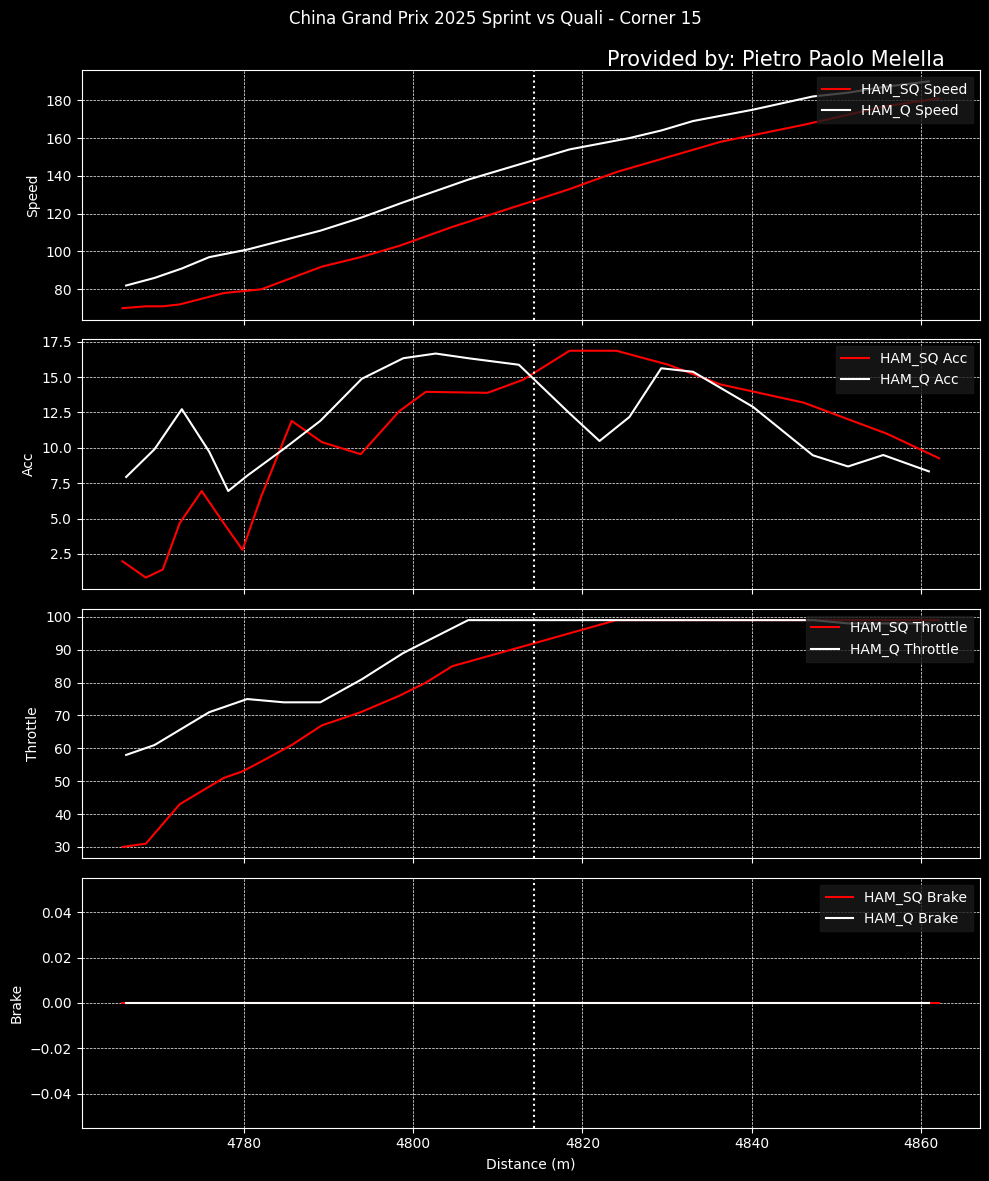

In [22]:
lap_sq = laps1.pick_drivers('HAM').pick_fastest()
lap_q = laps2.pick_drivers('HAM').pick_fastest()

laps = {'HAM_SQ': lap_sq, 'HAM_Q': lap_q}
session_info = {'EventName': 'China Grand Prix', 'Year': 2025}

corners=[13, [7,8], 15]

for corner in corners:

    ca = CornerAnalysis(
        laps=laps,
        circuit_info=circuit_info,
        session_info=session_info,
        corner_idxs=corner,
        before=50,
        after=50,
        session_label='Sprint vs Quali'
    )
    ca.plot_all()

In [14]:
# ---- Helper: wrap a lap and compute accel ----
class FastestLap:
    def __init__(self, lap, name_override=None):
        self.name = name_override or lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2

def compute_acceleration(df):
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6
    df['Sess_s']   = df['SessionTime'].dt.total_seconds()
    df['Acc']      = np.gradient(df['Speed_ms'], df['Sess_s'])
    return df

# ---- Updated Comparator ----
class CornerSpeedComparator:
    def __init__(self, laps_dict, circuit_info, session_info,
                 driver_color_map=None, n_interp=200, session_label=''):
        """
        :param laps_dict: dict mapping label→FastF1 Lap object, e.g. {'HAM_SQ': lap1, 'HAM_Q': lap2}
        :param circuit_info: session.get_circuit_info()
        :param session_info: {'EventName':…, 'Year':…}
        :param driver_color_map: optional dict label→color
        :param n_interp: interpolation points per corner
        :param session_label: text for the plot title
        """
        self.laps_dict       = laps_dict
        self.labels          = list(laps_dict.keys())
        self.driver_color_map= driver_color_map or {}
        self.n_interp        = n_interp
        self.circuit_info    = circuit_info
        self.session_info    = session_info
        self.session_label   = session_label

        self._prepare_laps()
        self._compute_corner_windows()
        self._compute_peaks()

    def _prepare_laps(self):
        """Wrap each lap and compute acceleration."""
        self.laps_data = []
        for label, lap in self.laps_dict.items():
            fl = FastestLap(lap, name_override=label)
            fl.df = compute_acceleration(fl.df)
            self.laps_data.append(fl)

    def _compute_corner_windows(self):
        """Define entry/apex/exit distances for each corner."""
        apexes = sorted(self.circuit_info.corners['Distance'].values)
        self.apexes = apexes
        # midpoint before/after each apex
        self.entries = [0.0] + [(apexes[i-1] + apexes[i]) / 2 for i in range(1, len(apexes))]
        self.exits   = [(apexes[i] + apexes[i+1]) / 2 for i in range(len(apexes)-1)]
        # last exit is maximum distance of any lap
        max_dist = max(fl.df['Distance'].max() for fl in self.laps_data)
        self.exits.append(max_dist)

    def _compute_peaks(self):
        """Interpolate speed over each corner window and take the max."""
        peak_dict = {}
        for idx, (start, apex, end) in enumerate(
                zip(self.entries, self.apexes, self.exits), start=1):
            grid = np.linspace(start, end, self.n_interp)
            interp_speeds = {
                fl.name: np.interp(grid, fl.df['Distance'], fl.df['Speed'])
                for fl in self.laps_data
            }
            peaks = {name: speeds.max() for name, speeds in interp_speeds.items()}
            peak_dict[f"Turn {idx}"] = peaks

        # build DataFrame: rows=turns, cols=your labels (in original order)
        self.df_peaks = pd.DataFrame.from_dict(peak_dict, orient='index')[self.labels]

    def plot_peak_speeds(self, figsize=(12, 6)):
        """Grouped bar chart of peak speeds per corner, with deltas annotated."""
        fig, ax = plt.subplots(figsize=figsize)

        # Build a safe color list
        default_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = [
            self.driver_color_map.get(label, default_cycle[i % len(default_cycle)])
            for i, label in enumerate(self.labels)
        ]

        # Plot
        self.df_peaks.plot.bar(ax=ax, rot=0, color=colors)

        # Labels & title
        event = self.session_info.get('EventName', 'Event')
        year  = self.session_info.get('Year', 'Year')
        ax.set_xlabel("Corner")
        ax.set_ylabel("Peak Speed (km/h)")
        ax.set_title(f"Corner Peak Speeds – {event} {year} {self.session_label}")
        ax.legend(title="Lap", loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=8)

        # Annotate each group with winner + deltas
        for i, corner in enumerate(self.df_peaks.index):
            speeds = self.df_peaks.loc[corner]
            winner = speeds.idxmax()
            win_sp  = speeds[winner]
            lines = [f"{winner}: {win_sp:.0f}"]
            for lbl in self.labels:
                if lbl == winner: continue
                diff = int(speeds[lbl] - win_sp)
                lines.append(f"{lbl}: {diff:+d}")
            ax.text(i, win_sp + 3, "\n".join(lines),
                    ha='center', va='bottom', color='white', fontsize=6)

        # Signature
        fig.text(0.95, 1.1, "Provided by: Pietro Paolo Melella",
                 ha='right', va='bottom', color='white', fontsize=15)

        plt.tight_layout(rect=[0, 0, 1.3, 1.05])
        plt.show()

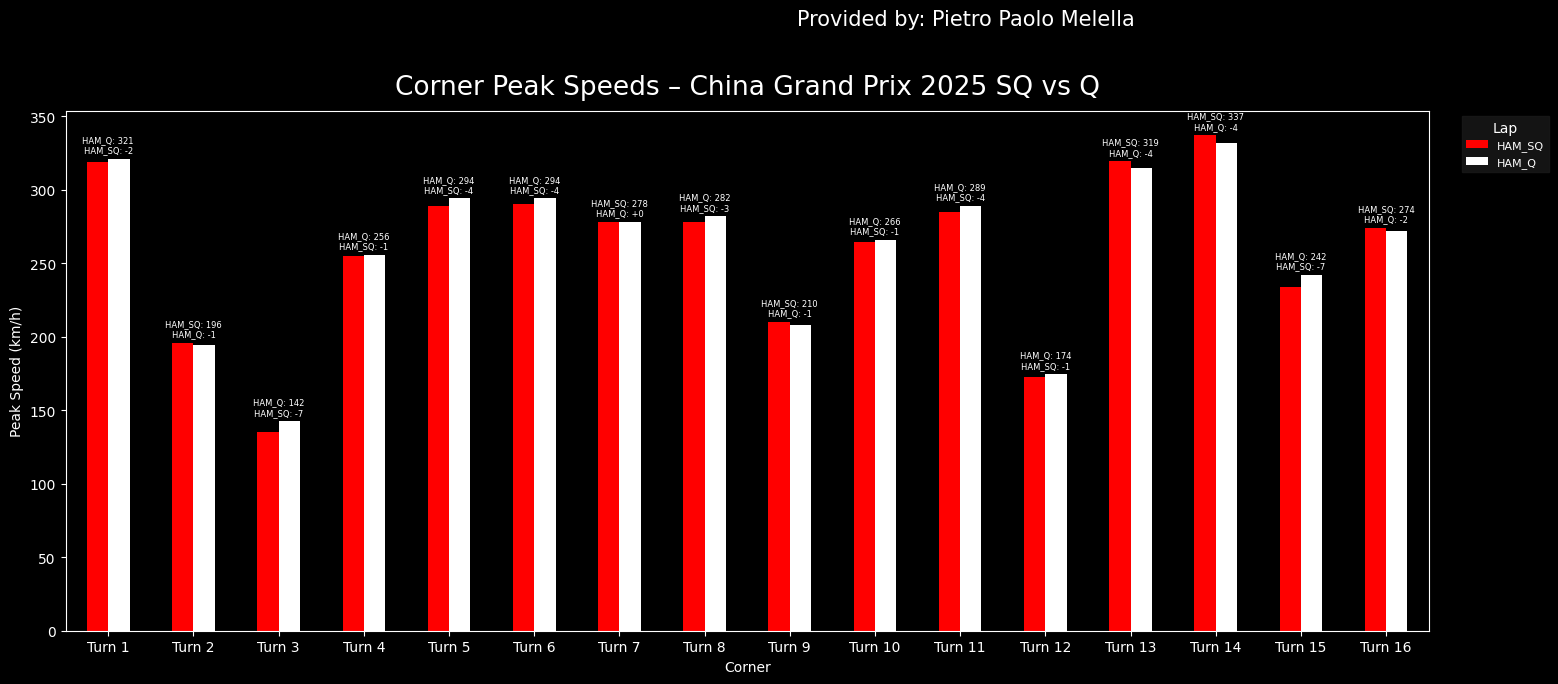

In [17]:
# Prepare your two laps:
lap_sq = laps1.pick_drivers('HAM').pick_fastest()
lap_q  = laps2.pick_drivers('HAM').pick_fastest()

laps = {'HAM_SQ': lap_sq, 'HAM_Q': lap_q}
session_info = {'EventName': 'China Grand Prix', 'Year': 2025}
color_map = {'HAM_SQ': 'red', 'HAM_Q': 'white'}

csc = CornerSpeedComparator(
    laps_dict=laps,
    circuit_info=circuit_info,
    session_info=session_info,
    driver_color_map=color_map,
    session_label='SQ vs Q'
)
csc.plot_peak_speeds()